In [6]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

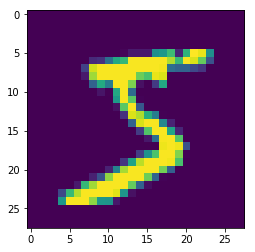

In [7]:
img = x_train[0]

plt.imshow(img)

In [2]:
print("Train shape - {}".format(x_train.shape))
print("Test shape - {}".format(x_test.shape))

Train shape - (60000, 28, 28)
Test shape - (10000, 28, 28)


### Reshape data

Data comes in as 28x28 pixels, so need to reshape image data to 784 for the input shape. Image labels are set to be `float` type and rescaled to improve performance of the model.

In [4]:
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### Change labels to categorical (one hot encoding)

Label column (`y_train` and `y_test`) currently state what digit the array of pixels correspond to. Need to transform them to a categorical array.

In [5]:
y_train[0]

5

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Build model

Only using an input layer and an output layer. Output layer needs to output 10 since that's the number of classes that we have.

In [13]:
model = models.Sequential() # Stack layers of the network one on top of each other
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,))) # Densely-connected neural network layer
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x_train, y_train, validation_split=0.2, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.2573 - acc: 0.9249 - val_loss: 0.1326 - val_acc: 0.9593
Epoch 2/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.1033 - acc: 0.9691 - val_loss: 0.0879 - val_acc: 0.9724
Epoch 3/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0679 - acc: 0.9794 - val_loss: 0.0909 - val_acc: 0.9727
Epoch 4/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0489 - acc: 0.9855 - val_loss: 0.0720 - val_acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0373 - acc: 0.9886 - val_loss: 0.0722 - val_acc: 0.9796
Epoch 6/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0291 - acc: 0.9909 - val_loss: 0.0770 - val_acc: 0.9766
Epoch 7/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0218 - acc: 0.9937 - val_loss: 0.

### Visualize model performance

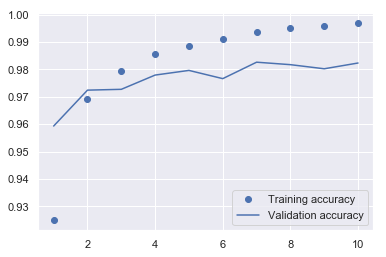

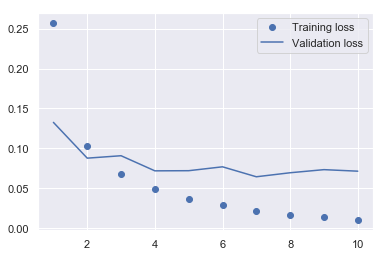

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.legend(loc="lower right")
plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend()

In [19]:
model.save("mnist_model.h5")